<h1>Car Retailer</h1>

<h4>Liberaries</h4>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.linear_model import LinearRegression

<h4>Loading Raw Data</h4>

In [3]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')

In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
rows,cols = raw_data.shape
print("Rows: ",rows,"\nColumns: ",cols)

Rows:  4345 
Columns:  9


<h4>Preprocessing</h4>

In [6]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


<p>There are 312 unique values in Model Column.</p>
<p>Too much dummy Variables Values to take into consideration, So drop the column</p>

In [7]:
data = raw_data.drop(['Model'],axis=1)

In [8]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [9]:
rows1,cols1 = data.shape
print("Rows: ",rows1,"\nColumns: ",cols1)

Rows:  4345 
Columns:  8


<h4>Dealing with missing values</h4>

In [10]:
is_na_data = pd.DataFrame(data.isnull().sum(),columns=['Missing'])
is_na_data

,Missing
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [11]:
is_na_data['Missing_Perc'] = (is_na_data['Missing'] / rows) * 100
is_na_data

,Missing,Missing_Perc
Brand,0,0.000000
Price,172,3.958573
Body,0,0.000000
Mileage,0,0.000000
EngineV,150,3.452244
Engine Type,0,0.000000
Registration,0,0.000000
Year,0,0.000000


In [12]:
data_drop_mv = data.dropna(axis=0)

In [13]:
data_drop_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [14]:
rows2,cols2 = data_drop_mv.shape
print("O. Rows: ",rows,
      "\nO. Columns: ",cols,
      "\nRows: ",rows2,
      "\nColumns: ",cols2,
      "\nRows removed: ", rows - rows2,
      "\nPerc. removed: ", round(100 - ((rows2/rows)*100),2),"%"
     )

O. Rows:  4345 
O. Columns:  9 
Rows:  4025 
Columns:  8 
Rows removed:  320 
Perc. removed:  7.36 %


<h4>Exploring the PDFs</h4>

<Axes: xlabel='Price', ylabel='Count'>

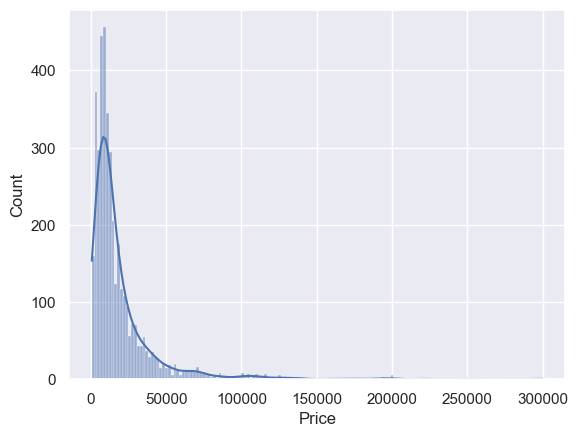

In [15]:
sns.histplot(data_drop_mv['Price'],kde=True)

In [16]:
print("Median: ",round(data_drop_mv['Price'].median(),2),
      "\nMean:",round(data_drop_mv['Price'].mean(),2),
      "\nDifference:",round(data_drop_mv['Price'].median()-data_drop_mv['Price'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  11500.0 
Mean: 19552.31 
Difference: -8052.31 
Left Skewed Data


In [17]:
q = data_drop_mv['Price'].quantile(0.99)
price_shinked_data = data_drop_mv[data_drop_mv['Price'] < q]
price_shinked_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [18]:
rows3,cols3 = price_shinked_data.shape
print("O. Rows: ",rows,
      "\nO. Columns: ",cols,
      "\nRows: ",rows3,
      "\nColumns: ",cols3,
      "\nRows removed: ", rows - rows3,
      "\nPerc. removed: ", round(100 - ((rows3/rows)*100),2),"%"
     )

O. Rows:  4345 
O. Columns:  9 
Rows:  3984 
Columns:  8 
Rows removed:  361 
Perc. removed:  8.31 %


<Axes: xlabel='Price', ylabel='Count'>

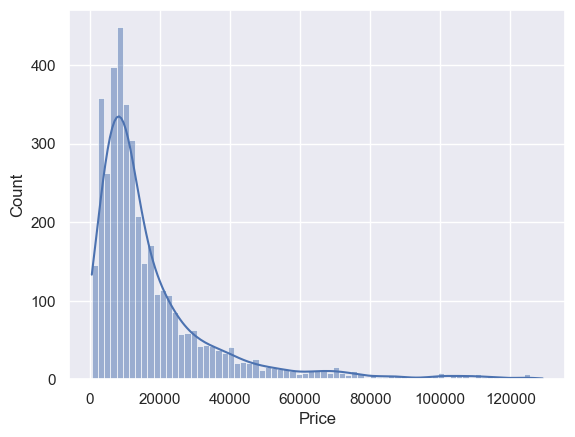

In [19]:
sns.histplot(price_shinked_data['Price'],kde=True)

In [20]:
print("Median: ",round(price_shinked_data['Price'].median(),2),
      "\nMean:",round(price_shinked_data['Price'].mean(),2),
      "\nDifference:",round(price_shinked_data['Price'].median()-price_shinked_data['Price'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  11400.0 
Mean: 17837.12 
Difference: -6437.12 
Left Skewed Data


<Axes: xlabel='Mileage', ylabel='Count'>

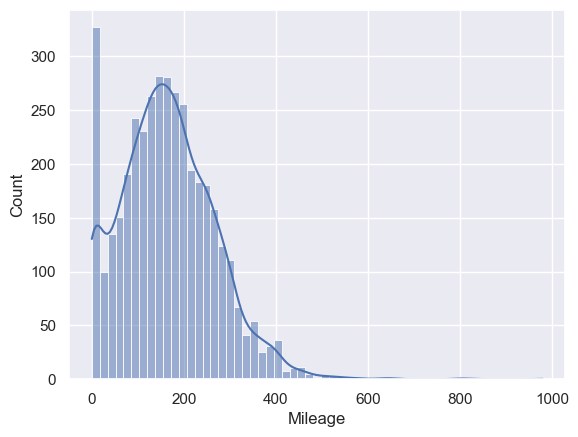

In [21]:
sns.histplot(price_shinked_data['Mileage'],kde=True)

In [22]:
print("Median: ",round(price_shinked_data['Mileage'].median(),2),
      "\nMean:",round(price_shinked_data['Mileage'].mean(),2),
      "\nDifference:",round(price_shinked_data['Mileage'].median()-price_shinked_data['Mileage'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  160.0 
Mean: 165.12 
Difference: -5.12 
Left Skewed Data


In [23]:
q1 = price_shinked_data['Mileage'].quantile(0.99)
mileage_shinked_data = price_shinked_data[price_shinked_data['Mileage'] < q1]
mileage_shinked_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [24]:
rows4,cols4 = mileage_shinked_data.shape
print("O. Rows: ",rows,
      "\nO. Columns: ",cols,
      "\nRows: ",rows4,
      "\nColumns: ",cols4,
      "\nRows removed: ", rows - rows4,
      "\nPerc. removed: ", round(100 - ((rows4/rows)*100),2),"%"
     )

O. Rows:  4345 
O. Columns:  9 
Rows:  3944 
Columns:  8 
Rows removed:  401 
Perc. removed:  9.23 %


<Axes: xlabel='Mileage', ylabel='Count'>

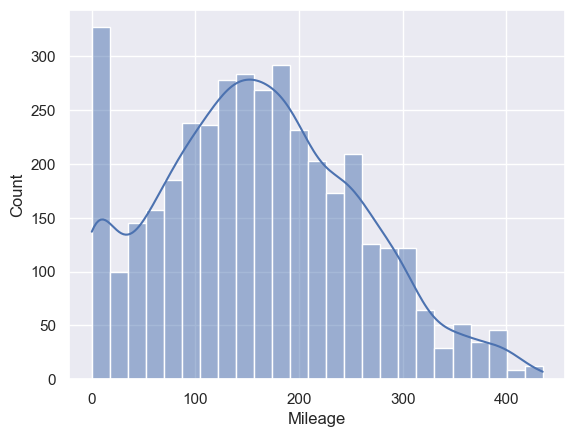

In [25]:
sns.histplot(mileage_shinked_data['Mileage'],kde=True)

In [26]:
print("Median: ",round(mileage_shinked_data['Mileage'].median(),2),
      "\nMean:",round(mileage_shinked_data['Mileage'].mean(),2),
      "\nDifference:",round(mileage_shinked_data['Mileage'].median()-mileage_shinked_data['Mileage'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  158.0 
Mean: 161.48 
Difference: -3.48 
Left Skewed Data


<Axes: xlabel='EngineV', ylabel='Count'>

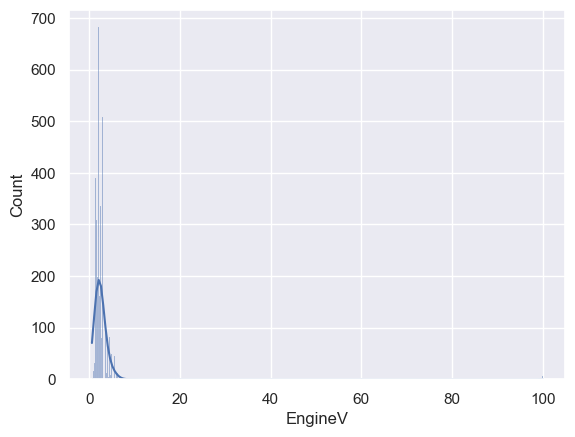

In [27]:
sns.histplot(mileage_shinked_data['EngineV'],kde=True)

In [28]:
print("Median: ",round(mileage_shinked_data['EngineV'].median(),2),
      "\nMean:",round(mileage_shinked_data['EngineV'].mean(),2),
      "\nDifference:",round(mileage_shinked_data['EngineV'].median()-mileage_shinked_data['EngineV'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  2.2 
Mean: 2.75 
Difference: -0.55 
Left Skewed Data


In [29]:
mileage_shinked_data['EngineV'].value_counts()

EngineV
2.00     681
3.00     484
2.50     335
1.60     308
2.20     271
        ... 
28.00      1
30.00      1
1.79       1
15.00      1
6.50       1
Name: count, Length: 70, dtype: int64

In [30]:
vol_shrinked_data = mileage_shinked_data[mileage_shinked_data['EngineV'] < 6.5]
vol_shrinked_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='EngineV', ylabel='Count'>

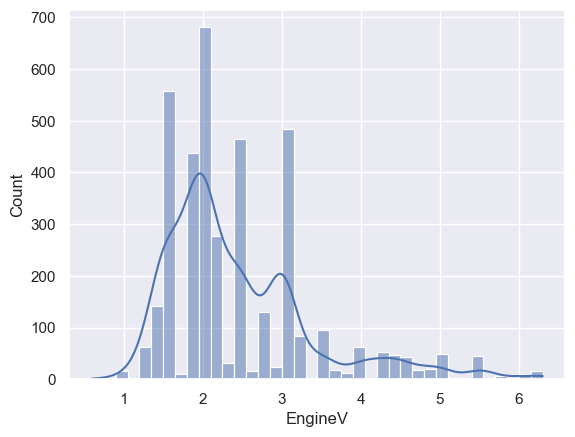

In [31]:
sns.histplot(vol_shrinked_data['EngineV'],kde=True)

In [32]:
rows5,cols5 = vol_shrinked_data.shape
print("O. Rows: ",rows,
      "\nO. Columns: ",cols,
      "\nRows: ",rows5,
      "\nColumns: ",cols5,
      "\nRows removed: ", rows - rows5,
      "\nPerc. removed: ", round(100 - ((rows5/rows)*100),2),"%"
     )

O. Rows:  4345 
O. Columns:  9 
Rows:  3921 
Columns:  8 
Rows removed:  424 
Perc. removed:  9.76 %


In [33]:
print("Median: ",round(vol_shrinked_data['EngineV'].median(),2),
      "\nMean:",round(vol_shrinked_data['EngineV'].mean(),2),
      "\nDifference:",round(vol_shrinked_data['EngineV'].median()-vol_shrinked_data['EngineV'].mean(),2),
      "\nLeft Skewed Data"
     )

Median:  2.2 
Mean: 2.44 
Difference: -0.24 
Left Skewed Data


<Axes: xlabel='Year', ylabel='Count'>

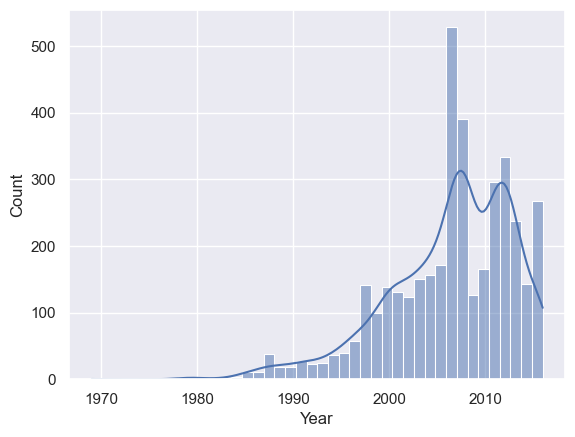

In [34]:
sns.histplot(vol_shrinked_data['Year'],kde=True)

In [35]:
print("Median: ",round(vol_shrinked_data['Year'].median(),2),
      "\nMean:",round(vol_shrinked_data['Year'].mean(),2),
      "\nDifference:",round(vol_shrinked_data['Year'].median()-vol_shrinked_data['Year'].mean(),2),
      "\nRight Skewed Data"
     )

Median:  2008.0 
Mean: 2006.41 
Difference: 1.59 
Right Skewed Data


In [36]:
q2 = vol_shrinked_data['Year'].quantile(0.01)
year_shinked_data = vol_shrinked_data[vol_shrinked_data['Year'] > q2]
year_shinked_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='Year', ylabel='Count'>

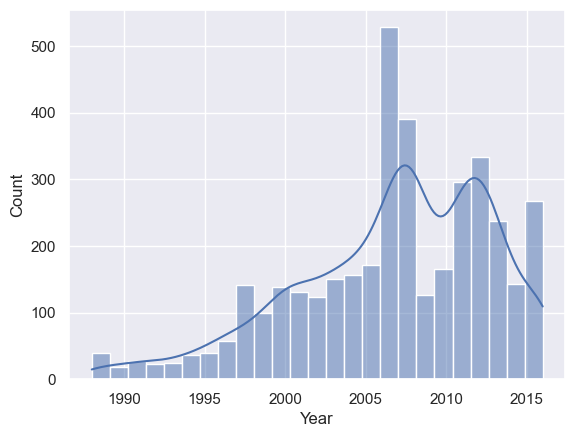

In [37]:
sns.histplot(year_shinked_data['Year'],kde=True)

In [38]:
print("Median: ",round(year_shinked_data['Year'].median(),2),
      "\nMean:",round(year_shinked_data['Year'].mean(),2),
      "\nDifference:",round(year_shinked_data['Year'].median()-year_shinked_data['Year'].mean(),2),
      "\nRight Skewed Data"
     )

Median:  2008.0 
Mean: 2006.71 
Difference: 1.29 
Right Skewed Data


In [39]:
data_cleaned = year_shinked_data.reset_index(drop=True)

In [40]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [41]:
rows6,cols6 = data_cleaned.shape
print("O. Rows: ",rows,
      "\nO. Columns: ",cols,
      "\nRows: ",rows6,
      "\nColumns: ",cols6,
      "\nRows removed: ", rows - rows6,
      "\nPerc. removed: ", round(100 - ((rows6/rows)*100),2),"%"
     )

O. Rows:  4345 
O. Columns:  9 
Rows:  3867 
Columns:  8 
Rows removed:  478 
Perc. removed:  11.0 %


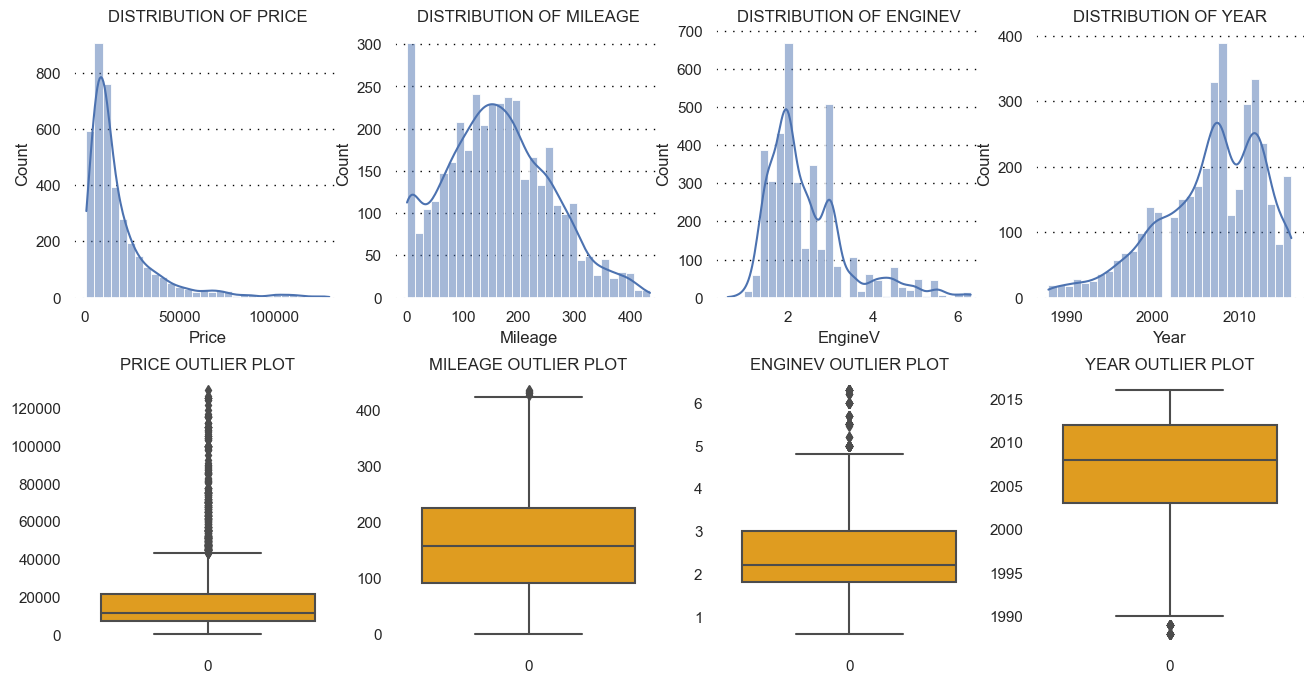

In [42]:
# Creating subplots
fig = plt.figure(figsize=(20,8))
spec = fig.add_gridspec(2,5)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])

# Adding color preference
bg_color = 'white'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08]:
    selection.set_facecolor(bg_color)

# Plotting the graph
dist_sec = [sec_01, sec_02, sec_03, sec_04]
box_sec = [sec_05, sec_06, sec_07, sec_08]
cnt = 0
for feature in data_cleaned.columns:
    if data_cleaned.dtypes[feature] != 'O':
        sns.histplot(data_cleaned[feature], ax=dist_sec[cnt], bins=30, color = 'b',kde=True)
        dist_sec[cnt].set_title('DISTRIBUTION OF '+ feature.upper())
        dist_sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sns.boxplot(data_cleaned[feature], ax=box_sec[cnt],  color='orange', fliersize=5)
        box_sec[cnt].set_title(feature.upper() + ' OUTLIER PLOT')
        cnt+=1
        
for location in ['top', 'right']:
    for selection in [sec_01, sec_02, sec_03, sec_04]:
        if selection == sec_01 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

<h4>Checking the OLS assumptions</h4>

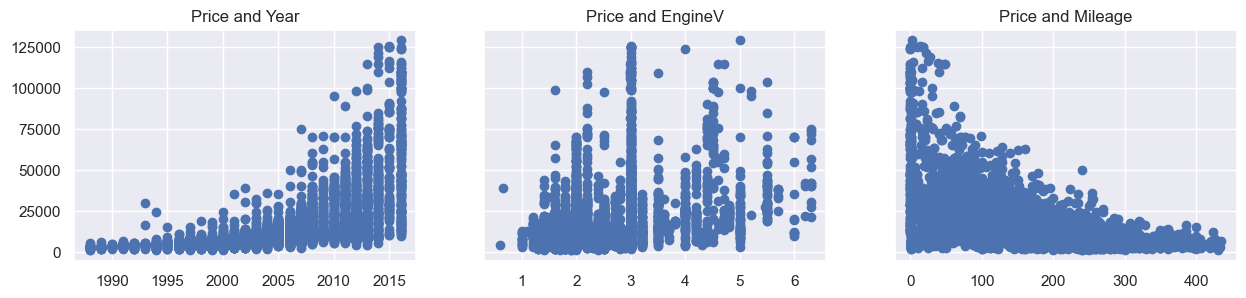

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

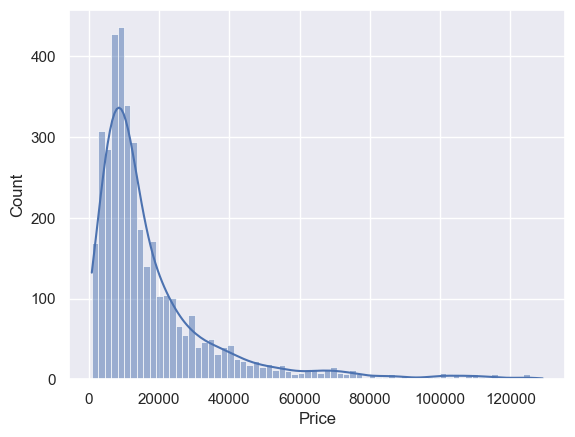

In [44]:
sns.histplot(data_cleaned['Price'],kde=True)

<h4>Relaxing the assumptions</h4>

<p>- Linearity</p>

In [45]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


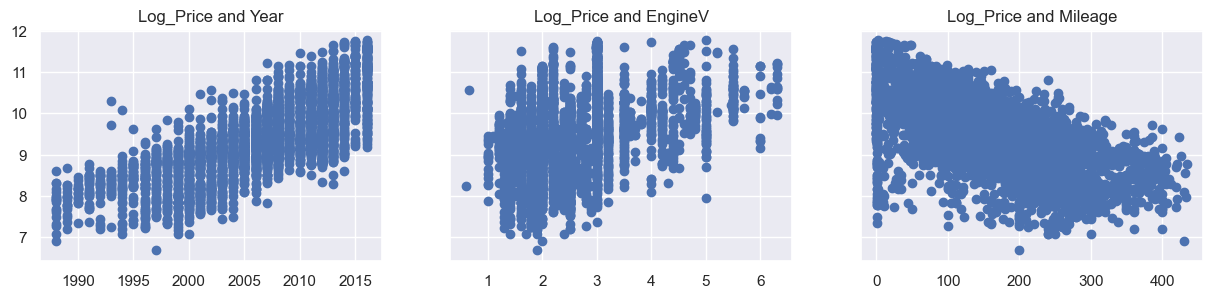

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log_Price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log_Price'])
ax2.set_title('Log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log_Price'])
ax3.set_title('Log_Price and Mileage')
plt.show()

In [47]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


<p>- Normality & Homoscedasticity</p>
<ul>
    <li>Normality: Assumed for Large sample using CLT</li>
    <li>Zero mean is removed by including Intercept</li>
    <li>Homoscedasticity is already achieved by using "log" and achieving a uniform width in scatter plot</li>
<ul>

<p>- No Autocorrelation</p>
<p>It's not time series data or panel data, So no action need to be taken.</p>

<p>- Multicollinearity</p>

In [48]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'], dtype=object)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [50]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


<ul>
    <li>if VIF = 1; no multicollinearity</li>
    <li>1 &lt VIF &lt 5; perfectly Ok</li>
    <li>VIF &gt (5/6/7/10); Rejected(Depends on client)</li>
</ul>
<p>Since, Year is above 10. We will drop Year<p>

In [51]:
data_revised = data_cleaned.drop(['Year'],axis=1)
data_revised.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


<h4>Create dummy variables</h4>

In [52]:
data_with_dummies = pd.get_dummies(data_revised,drop_first=True)

In [53]:
data_with_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


<h4>Preprocessing Data</h4>

In [54]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [55]:
req_columns = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [56]:
data_preprocessed = data_with_dummies[req_columns]
data_preprocessed.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


<h3>Linear Regression model</h3>

<p>Declare the inputs & targets</p>

In [57]:
targets = data_preprocessed['Log_Price']
inputs = data_preprocessed.drop(['Log_Price'],axis=1)

<p>Scale the data</p>

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [59]:
input_scaled = scaler.transform(inputs)

In [60]:
input_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

<p>Train & Test</p>

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled,targets,test_size=0.2,random_state=365)

<p>Create the regression</p>

In [62]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
y_hat = reg.predict(x_train)

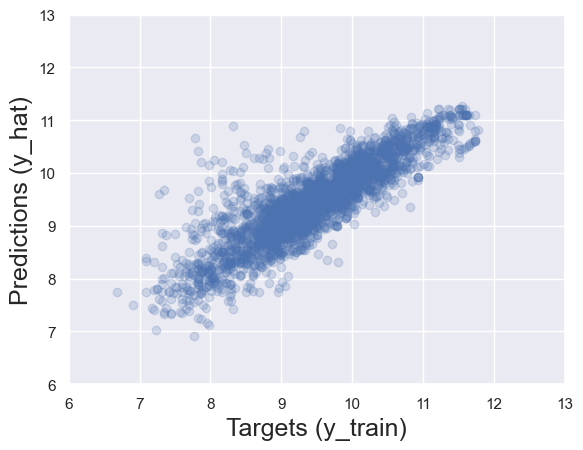

In [64]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<p>Check if values is close to 45 degree line</p>
<ul>
    <li>Near 7 & 10 the values is closer to 45 degree line</li>
    <li>But between 11 & 12, there is a dip from 45 degree line, But not that major</li>
</ul>
<p>So, our model is pretty good at predicting with trained x values =&gt Log Price values</p>

<p>Residuals - Estimates from the Errors</p>

Text(0.5, 1.0, 'Residuals PDF')

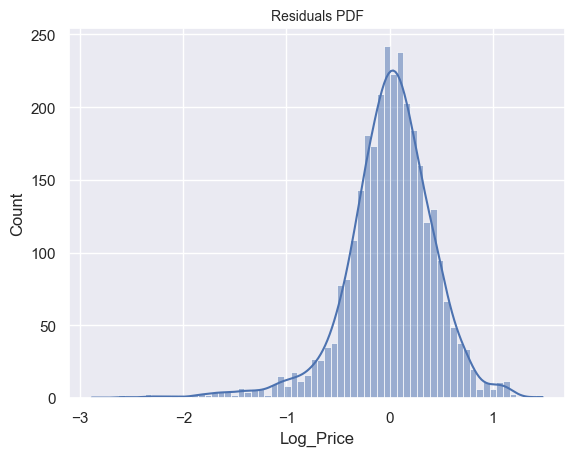

In [65]:
sns.histplot(y_train-y_hat,kde=True)
plt.title('Residuals PDF',size=10)

<p>It is normally distributed with Mean 0, But there is outliers in the negative side</p>
<p>There are certain observations for which (y_train - y_hat) is much lower than the mean =&gt This means those observations over estimate targets</p>
<p>the right side, the outliers observations under estimate the targets</p>

<h4>R squared</h4>

In [66]:
reg.score(x_train,y_train)

0.744996578792662

<h4>Finding weights & Bias</h4>

In [67]:
reg.intercept_

9.415239458021299

In [68]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [69]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


<h4>Testing</h4>

In [70]:
y_hat_test = reg.predict(x_test)

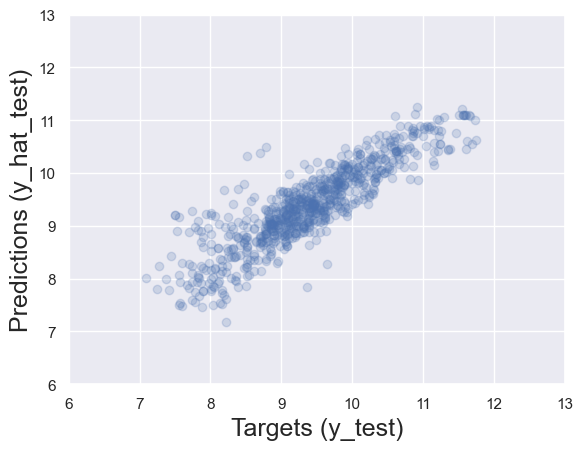

In [71]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [79]:
df_pf = pd.DataFrame([round(x,2) for x in np.exp(y_hat_test)],columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [80]:
df_pf['Target'] = [round(x,2) for x in np.exp(y_test.reset_index(drop=True))]

In [81]:
df_pf

,Predictions,Target
0,10685.50,2300.0
1,3499.26,2800.0
2,7553.29,2500.0
3,7463.96,6400.0
4,11353.49,9150.0
...,...,...
769,29651.73,29500.0
770,10732.07,9600.0
771,13922.45,18300.0
772,27487.75,68500.0


In [82]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [85]:
df_pf['Difference%'] = round(np.absolute(df_pf['Residual']/df_pf['Target']*100),2)

In [88]:
df_pf.sort_values(by="Difference%",ascending=False)

,Predictions,Target,Residual,Difference%
639,30628.28,4999.0,-25629.28,512.69
532,10019.90,1800.0,-8219.90,456.66
451,35956.50,6500.0,-29456.50,453.18
162,9954.42,1800.0,-8154.42,453.02
657,32481.05,6000.0,-26481.05,441.35
...,...,...,...,...
367,42703.68,42500.0,-203.68,0.48
110,25614.14,25500.0,-114.14,0.45
60,12469.21,12500.0,30.79,0.25
742,16960.31,16999.0,38.69,0.23


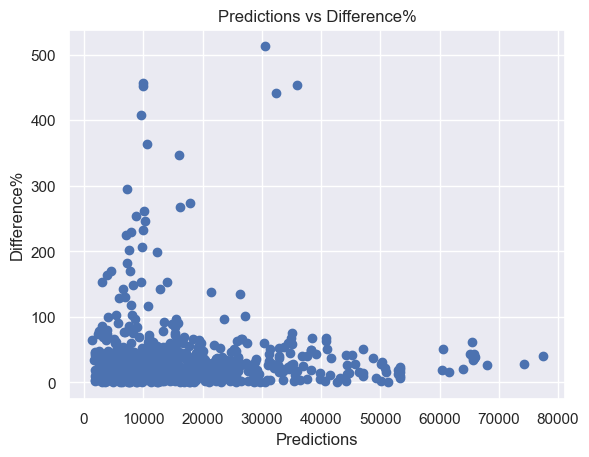

In [100]:
plt.scatter(df_pf['Predictions'],df_pf['Difference%'])
plt.title('Predictions vs Difference%')
plt.xlabel('Predictions')
plt.ylabel('Difference%')
plt.show()

<p>Might be adding Models column or overall damage condition of the car can make our predictions better</p>